In [7]:
import pandas as pd
import numpy as np
import matplotlib as plt
import bls

Consumer Price Index

In [8]:
cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv('bls_cpi_data.csv')

In [9]:
cpi_data = pd.read_csv('bls_cpi_data.csv')
cpi_data

,date,CUUR0000SA0
0,2013-01,230.280
1,2013-02,232.166
2,2013-03,232.773
3,2013-04,232.531
4,2013-05,232.945
...,...,...
110,2022-03,287.504
111,2022-04,289.109
112,2022-05,292.296
113,2022-06,296.311


In [10]:
cpi_data.columns = 'Date', 'CPI'
cpi_data

,Date,CPI
0,2013-01,230.280
1,2013-02,232.166
2,2013-03,232.773
3,2013-04,232.531
4,2013-05,232.945
...,...,...
110,2022-03,287.504
111,2022-04,289.109
112,2022-05,292.296
113,2022-06,296.311


Get Wages Data: wages and salaries for Private Industry Workers in all industries and occupations
12-month percent change

In [11]:
wages = bls.get_series('CIU2020000000000A')
wages.to_csv('bls_wages_data.csv')
wage_data = pd.read_csv('bls_wages_data.csv')
wage_data.columns = 'Date', 'Wages'
wage_data.head()

,Date,Wages
0,2013Q1,1.7
1,2013Q2,1.9
2,2013Q3,1.8
3,2013Q4,2.1
4,2014Q1,1.7


Format CPI data to match quarter format in wages data.

In [12]:
cpi_data['Date'] = cpi_data['Date'].str.replace('-03', 'Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-06', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-09', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-12', 'Q4')
cpi_data['Date']

0      2013-01
1      2013-02
2       2013Q1
3      2013-04
4      2013-05
        ...   
110     2022Q1
111    2022-04
112    2022-05
113     2022Q2
114    2022-07
Name: Date, Length: 115, dtype: object

Time to remove all data entries that don't have Quarter fromatted data. Using panda's str.contain, we can identify the rows containing "-" and dropping them.

In [14]:
new_cpi = cpi_data[(cpi_data.Date.str.contains("-") == False)]
new_cpi.to_csv('cpi-clean.csv')
new_cpi

,Date,CPI
2,2013Q1,232.773
5,2013Q2,233.504
8,2013Q3,234.149
11,2013Q4,233.049
14,2014Q1,236.293
17,2014Q2,238.343
20,2014Q3,238.031
23,2014Q4,234.812
26,2015Q1,236.119
29,2015Q2,238.638


In [15]:
new_wages_df = wage_data
new_wages_df

,Date,Wages
0,2013Q1,1.7
1,2013Q2,1.9
2,2013Q3,1.8
3,2013Q4,2.1
4,2014Q1,1.7
5,2014Q2,1.9
6,2014Q3,2.3
7,2014Q4,2.2
8,2015Q1,2.8
9,2015Q2,2.2


Problem: Data in the CPI set come in absolute point values. The wages dataset are reported in percentage % measuring growth. Each row of our wages data is a percentage of how wages would have risen that quarter had the current rate continued for the full 12 months. The quarterly rage of wages need to be adjusted. You could state the Q1 rate of 3.5% is a quarterly growth rate of (3.5/4) 0.875% 

In [16]:
newnum = 177.1
def process_wages(x):
    global newnum
    if type(x) is str:
        return x
    elif x:
        newnum = (x/400) * newnum + newnum
        return newnum
    else:
        return
newWages = new_wages_df.applymap(process_wages)

In [17]:
newWages

,Date,Wages
0,2013Q1,177.852675
1,2013Q2,178.697475
2,2013Q3,179.501614
3,2013Q4,180.443997
4,2014Q1,181.210884
5,2014Q2,182.071636
6,2014Q3,183.118548
7,2014Q4,184.125700
8,2015Q1,185.414580
9,2015Q2,186.434360


# Merging and Plotting Data

In [20]:
merged_data = pd.merge(new_cpi, newWages, on='Date')
merged_data

,Date,CPI,Wages
0,2013Q1,232.773,177.852675
1,2013Q2,233.504,178.697475
2,2013Q3,234.149,179.501614
3,2013Q4,233.049,180.443997
4,2014Q1,236.293,181.210884
5,2014Q2,238.343,182.071636
6,2014Q3,238.031,183.118548
7,2014Q4,234.812,184.125700
8,2015Q1,236.119,185.414580
9,2015Q2,238.638,186.434360


Text(0.5, 0, 'Dates')

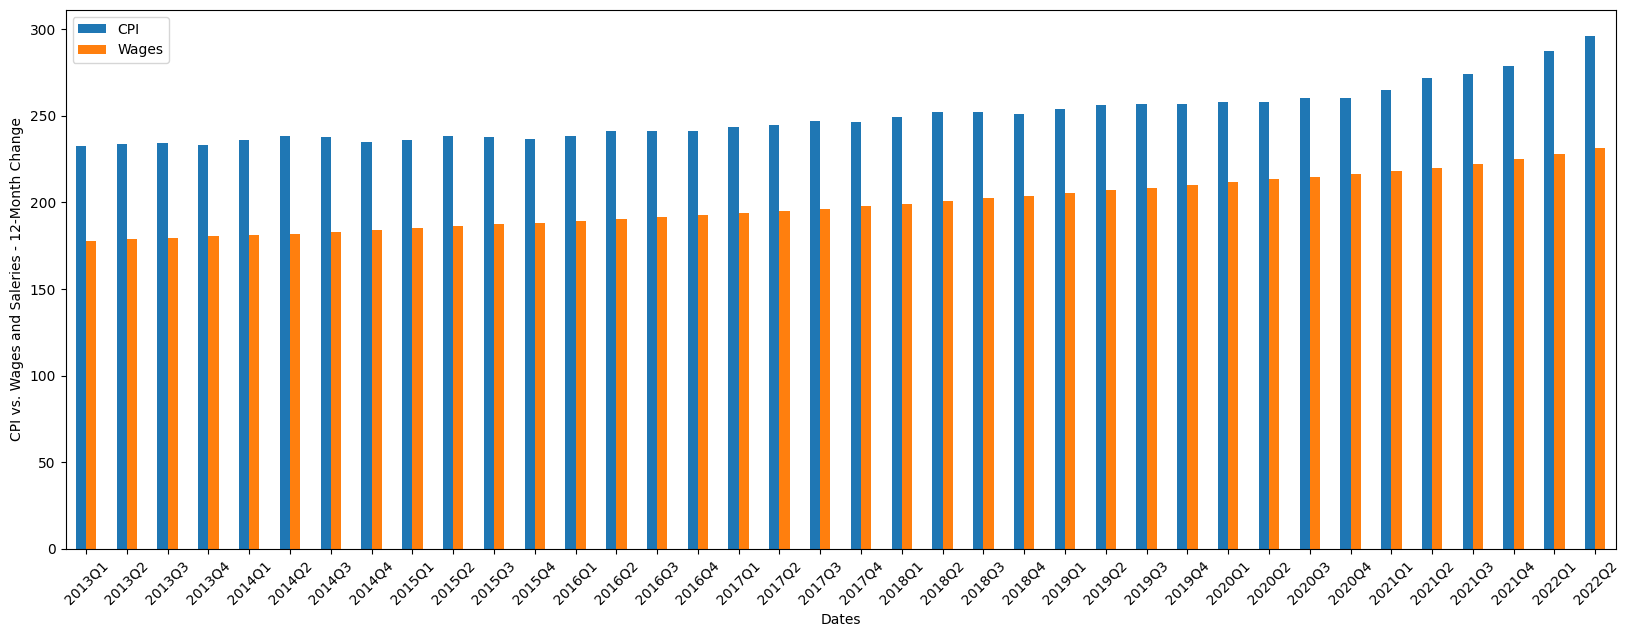

In [22]:
ax = merged_data.plot(kind='bar', figsize=(20, 7))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs. Wages and Saleries - 12-Month Change')
ax.set_xlabel("Dates")

C:\Users\matt1\AppData\Local\Temp\ipykernel_21004\2930279261.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(merged_data.Date, rotation=45)


Text(0.5, 0, 'Dates')

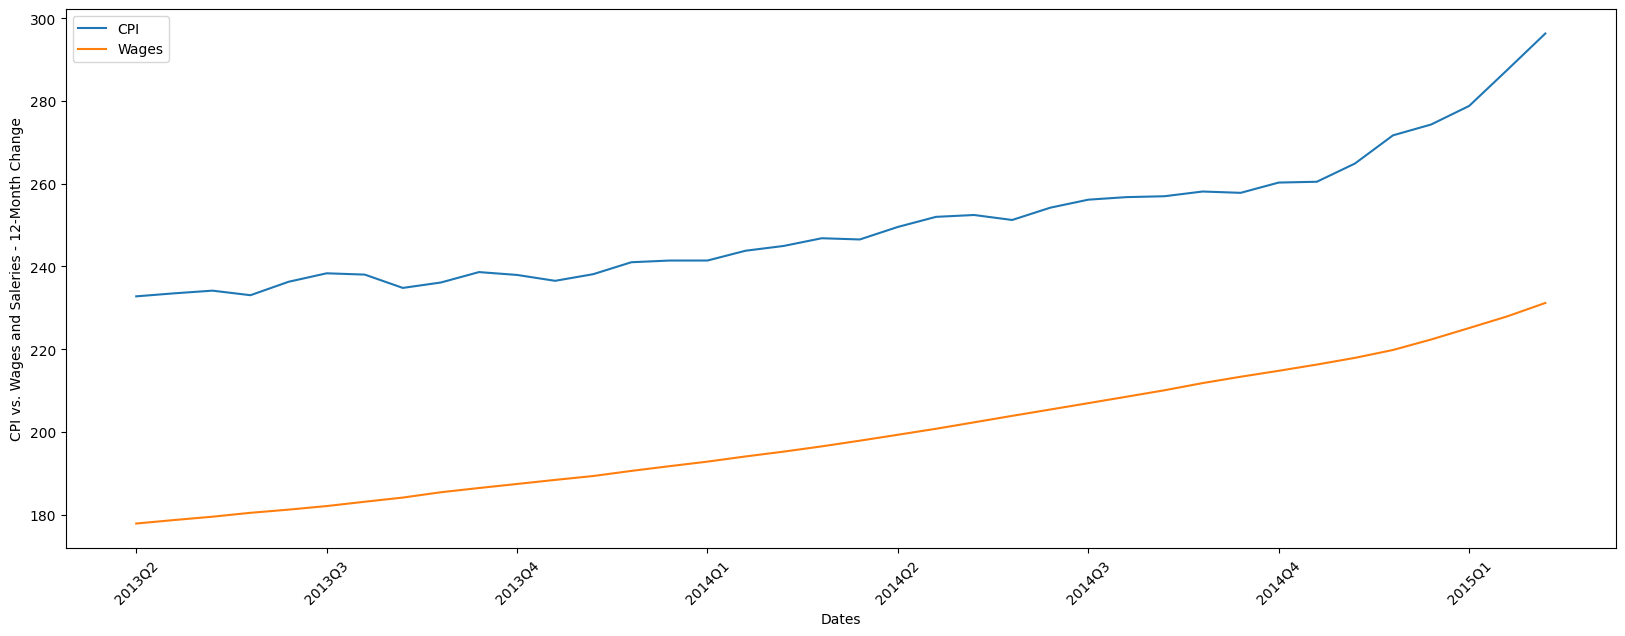

In [23]:
ax = merged_data.plot(kind='line', figsize=(20, 7))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs. Wages and Saleries - 12-Month Change')
ax.set_xlabel("Dates")